# Basic Operations on Images

### Requirements
Numpy   (For Matrix manipulations)

Pillow  (For Image presentation)

In [1]:
%pip install numpy
%pip install Pillow


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
from PIL import Image as im

### Helper Functions

In [3]:
def read_8bit_img_from_raw_data(filename, height, width):
    # Returns a numpy 2D array of 8bit integers representing image pixels
    # Open specified file
    with open(filename, "rb") as f:
        # Convert bytes read from file into a numpy array
        img = np.frombuffer(f.read(), dtype=np.ubyte)
        # This check is for images with some header, only raw bytes will be read, extra bytes will be sliced out
        if img.size > height * width:
            img = img[img.size-(height*width):]
        return img.reshape((height, width)).astype(np.ubyte)

def write_8bit_img_to_raw_data(img, filename):
    # Writes the argument numpy 2D array into a file by converting values into single bytes
    # Open Specified file
    with open(filename, "wb") as f:
        # Write bytes into file
        f.write(img.tobytes())
        print("Image was written to {0}".format(filename))

def normalize(img, ceil=255):
    # Returns a normalized version of the argument numpy 2D array
    # Checks if the image is already normalized
    if img.min() < 0 or img.max() > ceil:
        # Copy the input image
        normalized_img = img.copy()
        # Subtract the minimum of the input image
        normalized_img = normalized_img - img.min()
        # Multiplication of ceil to the ratios of the image pixels with respect to the image maximum
        normalized_img = (ceil * normalized_img / normalized_img.max())
        return normalized_img.astype(np.ubyte)
    else:
        return img

### Problem #1: Arithmetic operation - subtraction
Write a program for subtracting Input1 from Input2 images below.

Export WashingtonDC_subtract as an output filename (in .tif or .raw).

Input1: WashingtonDC-ver1 (512x512, 8-bit image)

Input2: WashingtonDC-ver2 (512x512, 8-bit image)

In [4]:
def subtract(img1, img2):
    # Return normalized subtracted 2D numpy array
    return normalize(img1 - img2)

In [5]:
def subtract_elementwise(img1, img2):
    # Returns normalized subtracted 2D numpy array, without using numpy subtraction syntax
    img3 = np.empty(img1.shape)
    for i in range(img1.shape[0]):
        for j in range(img1.shape[1]):
            img3[i][j] = img1[i][j] - img2[i][j]
    return normalize(img3)


In [6]:
sub_input_1 = read_8bit_img_from_raw_data("data/WashingtonDC-ver1.raw", 512, 512)
sub_input_2 = read_8bit_img_from_raw_data("data/washingtonDC-ver2.raw", 512, 512)
sub_output_1 = subtract(sub_input_1, sub_input_2)
write_8bit_img_to_raw_data(sub_output_1, "WashigntonDC_subtract.raw")

Image was written to WashigntonDC_subtract.raw


[0, 254]


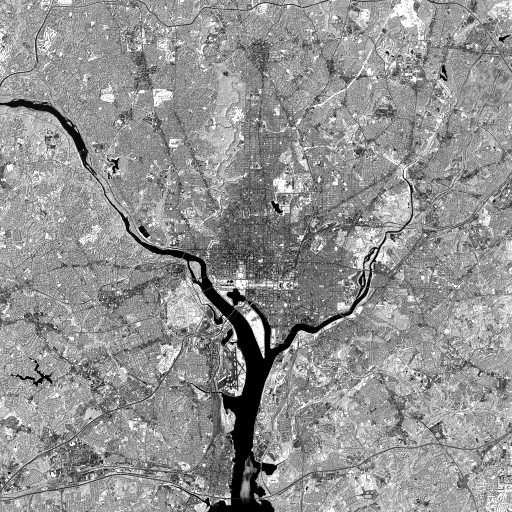

In [7]:
print("[{}, {}]".format(sub_input_1.min(), sub_input_1.max()))
im.fromarray(sub_input_1)

[0, 255]


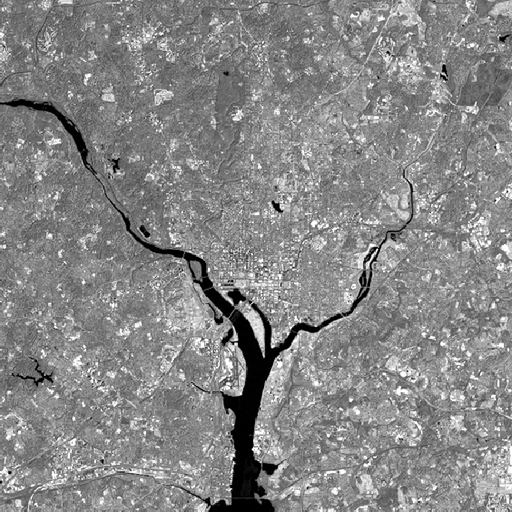

In [8]:
print("[{}, {}]".format(sub_input_2.min(), sub_input_2.max()))
im.fromarray(sub_input_2)

[0, 255]


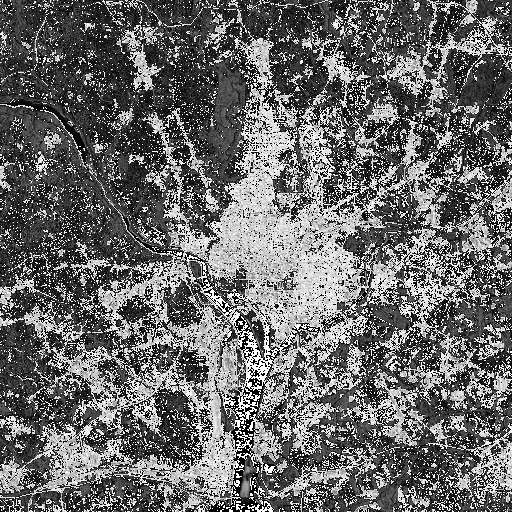

In [9]:
print("[{}, {}]".format(sub_output_1.min(), sub_output_1.max()))
im.fromarray(sub_output_1)

### Problem #2: Point processing
Write a program for generating a negative (inverted) version of Input image below.

Export lena_negative.raw as an output file (in .tif or .raw).

Input: lena (512x512, 8-bit image)

In [10]:
def invert_8bit(img):
    # Returns a negated version of the input image
    inverted_img = img.copy()
    inverted_img = 255 - inverted_img
    return inverted_img

In [11]:
inv_input = read_8bit_img_from_raw_data("data/lena.raw", 512, 512)
inv_output = invert_8bit(inv_input)
write_8bit_img_to_raw_data(inv_output, "lena_negative.raw")

Image was written to lena_negative.raw


[20, 244]


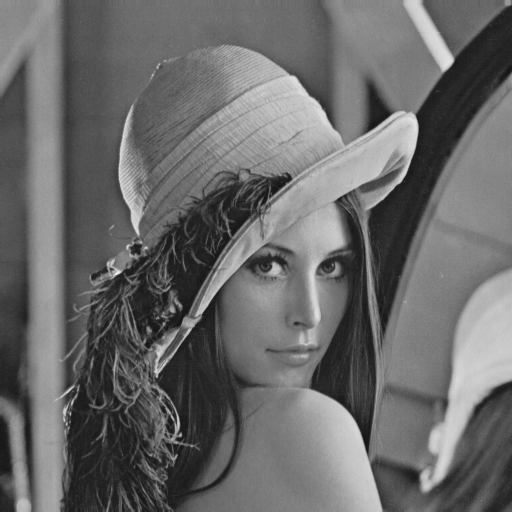

In [12]:
print("[{}, {}]".format(inv_input.min(), inv_input.max()))
im.fromarray(inv_input)

[11, 235]


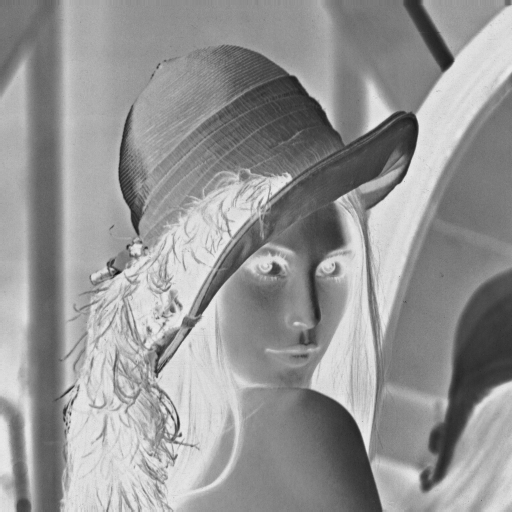

In [13]:
print("[{}, {}]".format(inv_output.min(), inv_output.max()))
im.fromarray(inv_output)

### Problem #3: Geometric transformation - translation
Write a program for translating Input image below by 5 pixels for both x- and y- directions.

Export lena_translation.raw as an output file (in .tif or .raw).

Input: lena (512x512, 8-bit image)

In [14]:
def spatial_translation(img, x_offset=0, y_offset=0):
    # Returns spatially translated 2D numpy array, with padded 0 pixels for the empty indices
    height, width = img.shape
    translated_img = np.empty((height, width), dtype=np.ubyte)
    for i in range(height):
        for j in range(width):
            if i + y_offset >= height or j + x_offset >= width or i + y_offset < 0 or j + x_offset < 0:
                continue
            translated_img[i + y_offset][j + x_offset] = img[i][j]
    return translated_img

In [15]:
spat_input = read_8bit_img_from_raw_data("data/lena.raw", 512, 512)
spat_output = spatial_translation(spat_input, 5, 5)
write_8bit_img_to_raw_data(spat_output, "lena_translation.raw")

Image was written to lena_translation.raw


[20, 244]


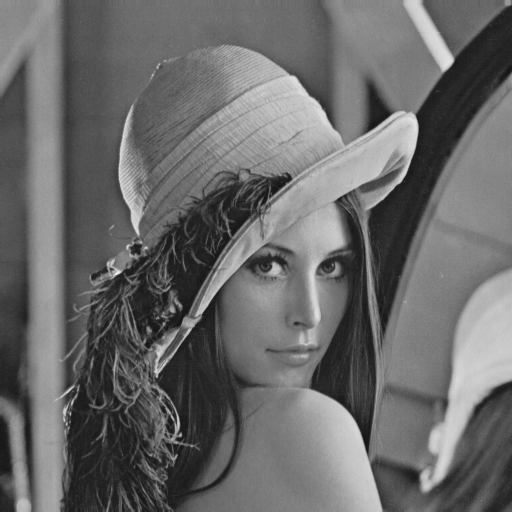

In [16]:
print("[{}, {}]".format(spat_input.min(), spat_input.max()))
im.fromarray(spat_input)

[0, 244]


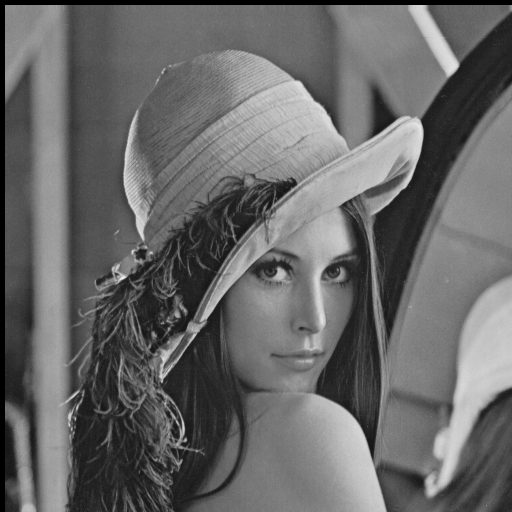

In [17]:
print("[{}, {}]".format(spat_output.min(), spat_output.max()))
im.fromarray(spat_output)

### Problem #4: Intensity-level slicing
Write a program for intensity-level slicing of Input image below.

Use the function T(r) in the figure below. Export pollen_intensity_slicing as an output file (in .tif or .raw).

Input: pollen (500x500, 8-bit image)


Note: For this input, there was found an extra header of 148 bytes, those were removed using the size check in the helper function read_8bit_image_from_raw_data()

In [18]:
def intensity_8bit_slicing(img, floor=255, ceil=255, val=255):
    # Returns an image with sliced intensity interval specified from the arguments passed, and set to val
    height, width = img.shape
    sliced_img = img.copy()
    for i in range(height):
        for j in range(width):
            if floor <= img[i][j] < ceil:
                sliced_img[i][j] = val
    return sliced_img

In [19]:
slic_input = read_8bit_img_from_raw_data("data/pollen.raw", 500, 500)
slic_output = intensity_8bit_slicing(slic_input, 75, 125, 200)
write_8bit_img_to_raw_data(slic_output, "pollen_intensity_slicing.raw")

Image was written to pollen_intensity_slicing.raw


[91, 138]


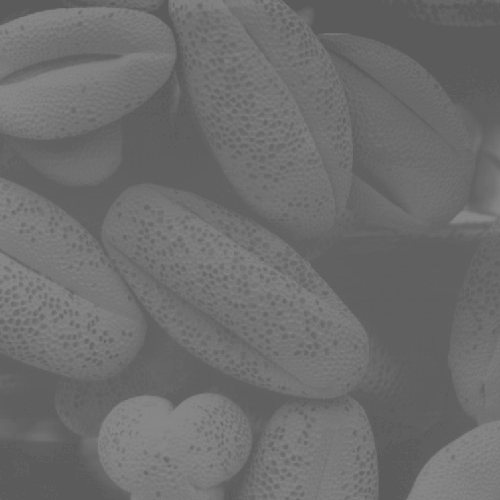

In [20]:
print("[{}, {}]".format(slic_input.min(), slic_input.max()))
im.fromarray(slic_input)

[125, 200]


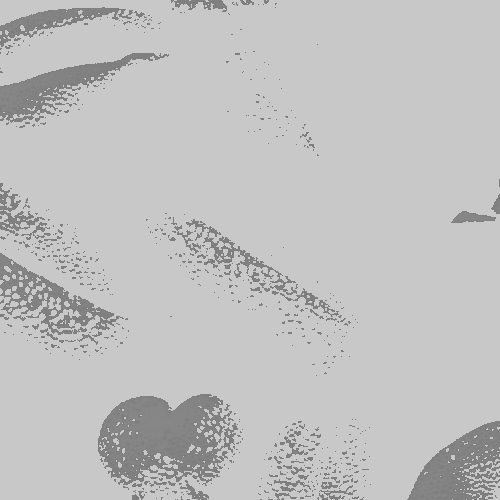

In [21]:
print("[{}, {}]".format(slic_output.min(), slic_output.max()))
im.fromarray(slic_output)